<a href="https://colab.research.google.com/github/noamshemesh14/q_0/blob/master/HW3_Data_Exploration_%26_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to DS 094700 spring 2023

---

#HW3

Faculty of Data and Decision Sciences at the Technion – Israel Institute of Technology


## Introduction

In the following notebook we are going to exercise the **data exploration**, **preprocess** phases via the *google colab* platform.<br>
When using data as an input to a model, we can not treat is just as a "bunch of numbers".<br>
Features of the data can be distributed differently, have different meaning, be missing for some (potentially not random) reasons, etc..

This notebook is a skeleton for your work. <br>
You need to fill in the code where you are requested to (questions denoted by **Q**), and submit the full solution via Moodle.<br>
The solution for this exercise is the notebook itself (with your solutions filled in).<br>
In order to work on the notebook on your own, please go to `File > Save a copy in drive`.<br>
Afterwards, change the notebook name to `hw3_123456789_987654321.ipynb` where `123456789` and `987654321` are your ids.<br>
When you're finished, you can download the notebook as a file by `File > Download > Download as .ipynb`. <br>
Your sumbission is a single `.ipynb` file.

In this exercise, you are requested to answer the questions via code cells and text cells, depends on the question.

Your grade on this submission will be binary.

# Data Exploation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(17)

Today we are going to work with the California housing dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

Please run the following hidden cell:

In [ ]:
#@markdown hidden cell
random_features = list(np.random.choice(range(len(data['feature_names'])), size=3, replace=False))
random_indices1 = list(np.random.choice(range(data['data'].shape[0]), size=20, replace=False))
random_indices2 = list(np.random.choice(range(data['data'].shape[0]), size=5000, replace=False))
data['data'][np.ix_(random_indices1, random_features[:-1])] = np.nan
data['data'][random_indices2, random_features[-1]] = np.nan

Sklearn datasets' interface is similar to dictionary, with keys and values:

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Use this property to answer the following questions:<br>
**Q:** What are the features?, What is the target value? How many observations are there?

In [ ]:
# Answer

**Q:** Create a pd.DataFrame with all features as columns, as well as the target as column. <br>Make sure you use the features names. Present the first 12 rows of this dataset

In [ ]:
# Answer

### Missing Values

Sometimes our data can have missing values. <br>
This means that for some observations, we do not observe all features, but only a subset of them. <br>Missing data is noted by `nan`. <br>
**Q:** Identify which features have missing values. <br>
How much records are missing this feature? how much missing values precetange is it for each feature?

In [ ]:
# Answer

### Features Distribution

**Q:** Please choose 2 features that have no missing values. For each feature:
* Is this feature categorical? discrete? continuous?
* Describe its meaning (in words)
* Visualize their distribution and note one observation from this visualization.

For visualizations you can use a [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), a [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [displot](https://seaborn.pydata.org/generated/seaborn.displot.html), or [pandas plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Please use log-scale if necessary.


In [ ]:
# Answer

*Answer:*

In [ ]:
# Answer

*Answer:*

## Correlations

We would also like to look for connections between features by looking at the pairwise correlations between features.<br>
**Q:** Plot a heatmap of the feature correlation matrix. <br>
For heatmap visualization you can use either `plt.matshow` or `sns.heatmap`. <br>
Please use 'seismic' colormap, where red = 1 and blue = -1. <br>
Make sure that the names of the features appear in the x and y ticks.

In [ ]:
# Answer

This is the seismic colormap: 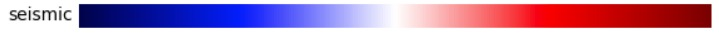<br>
**Q:** Why did we use this kind of colormap? (diverging colormap with white in the middle)

*Answer:*

**Q:** What can you tell from looking at this correlation matrix?

*Answer:*

## Handling Missing Data

The data as it currently is, can not just be inserted as input to a model, since some values are missing. <br>
We will tackle this problem in two ways:

### Drop rows

**Q:** For features that their missing precentage is $0 < p < 1\%$ : drop the corresponding records.<br>

Hint: first, identify features that have this precentage. Then, for each feature, take relevant rows (rows with no missing values for this feature) by using `df[feature].notna()`.

In order to validate your operations, you can print the shape of the dataframe before and after, and/or count how many missing values are there now per feature.


In [ ]:
# Answer

### Imputation

We have one feature $f^*$ that its missing precentage is $p > 20\%$. <br>We wouldn't want to drop the corresponding records, that's too much data to throw away.<br>
Therefore, we are going to impute (fill the missing values) by a regression model. This imputation method is called *regression imputation*.<br><br>

Here are the main properties of this regression task:
* features (`X`) : all features besides $f^*$
* target : $f^*$
* train set : records (rows) with complete data (no missing values at all)
* test set : records (rows) with missing data in $f^*$.


Finally, when we have predictions for the test set, we can fill the information in our data, instead of the current missing values. <br>
In the end, we will have complete dataset, with no missing values.

**Q:** Identify (by code) which feature is $f^*$<br>
**Q:** Use `df[feature].isna()` to identify which rows should go to train and which to test.

In [ ]:
# Answer

**Q:** Put full records (records with no missing values) values of all other features (all features besides $f^*$) in a variable `X_train`.<br>
**Q:** Put full records values of the imputed feature ($f^*$) in a variable `y_train`.<br>
**Q:** Put missing records (records with missing values) values of all other features in a variable `X_test`.

Important notes:
* do not insert the target values into `X_train` or `X_test`. (think why)
* do not insert $f^*$ into `X_train` or `X_test`

In [ ]:
# Answer

**Q:** Scale data by a scaling method of your choice. You can use [sklearn scalers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) (e.g. StandardScaler, MinMaxScaler...)

* Remember to fit the scaler only by train data.
* Remember not to scale the target variable.

In [ ]:
# Answer

Now we are set to train our regression model. We will use [regression KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)<br>
**Q:** Train the regression model with `X_train, y_train` and predict values for `X_test`. Set `n_neighbors=5`

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Answer

**Q:** Use the predictions to impute your missing values in the data.<br>Validate your answer by counting the number of missing data (should be 0).

In [ ]:
# Answer